In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [2]:
#Importing Dataset
df = pd.read_csv("wine.csv")
print(df.head())

X = df.values
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


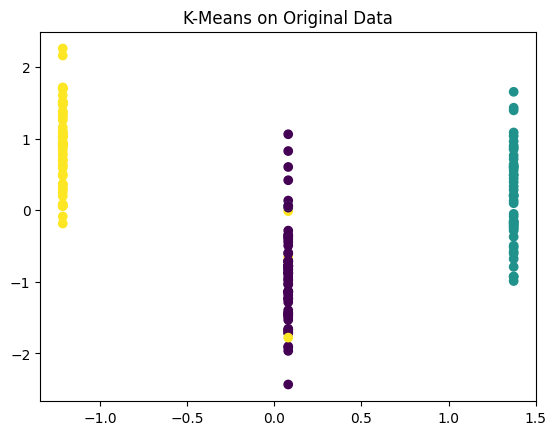

Silhouette Score of Original Data :  0.30648398324833453
Davies-Bouldin Score of Original Data :  1.315707552261773


In [3]:
#Creating KMeans model without PCA

k=3
km_orig = KMeans(n_clusters=k,random_state=42)
clust_orig = km_orig.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clust_orig)
plt.title("K-Means on Original Data")
plt.show()

print("Silhouette Score of Original Data : ",silhouette_score(X_scaled,clust_orig))
print("Davies-Bouldin Score of Original Data : ",davies_bouldin_score(X_scaled,clust_orig))


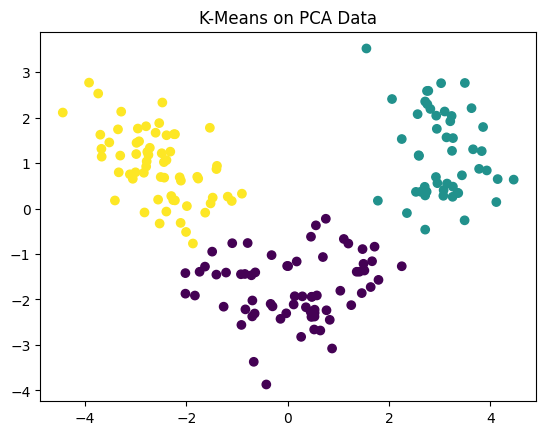

Silhouette Score of PCA Data :  0.6024415520362845
Davies-Bouldin Score of PCA Data :  0.5397078562575711


In [4]:
#Creating KMeans model with PCA

km_pca = KMeans(n_clusters=k,random_state=42)
clust_pca = km_pca.fit_predict(X_pca)

plt.scatter(X_pca[:,0],X_pca[:,1],c=clust_pca)
plt.title("K-Means on PCA Data")
plt.show()

print("Silhouette Score of PCA Data : ",silhouette_score(X_pca,clust_pca))
print("Davies-Bouldin Score of PCA Data : ",davies_bouldin_score(X_pca,clust_pca))
